<a href="https://colab.research.google.com/github/diwakarojha/Tensorflow_Keras/blob/main/3_Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import logging
import math
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,Input,MaxPooling2D
from tensorflow.keras.utils import plot_model

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
_URL='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir=tf.keras.utils.get_file("cats_and_dogs_filtered.zip",origin=_URL,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [5]:
zip_dir_base=os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [6]:
base_dir=os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
validation_dir=os.path.join(base_dir,'validation')

train_cat_dir=os.path.join(train_dir,'cats')
train_dog_dir=os.path.join(train_dir,'dogs')

validation_cat_dir=os.path.join(validation_dir,'cats')
validation_dog_dir=os.path.join(validation_dir,'dogs')

In [7]:
num_cat_tr=len(os.listdir(train_cat_dir))
num_dog_tr=len(os.listdir(train_dog_dir))

num_cat_val=len(os.listdir(validation_cat_dir))
num_dog_val=len(os.listdir(validation_dog_dir))

total_train=num_cat_tr+num_dog_tr
total_test=num_cat_val+num_dog_val

num_cat_tr,num_dog_tr,num_cat_val,num_dog_val,total_train,total_test

(1000, 1000, 500, 500, 2000, 1000)

In [8]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [46]:
train_data_generator=ImageDataGenerator(rescale=1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        zoom_range=0.2,
                                        shear_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
test_data_generator=ImageDataGenerator(rescale=1./255)

In [47]:
train_data_gen=train_data_generator.flow_from_directory(directory=train_dir,
                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                        class_mode='binary',
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=True)
val_data_gen=train_data_generator.flow_from_directory(directory=validation_dir,
                                                      target_size=(IMG_SHAPE,IMG_SHAPE),
                                                      class_mode='binary',
                                                      batch_size=BATCH_SIZE,
                                                      shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
sample_training_exp,_=next(train_data_gen)

In [52]:
def plot_images(image_arr):
  fig,ax=plt.subplots(1,5,figsize=(20,20))
  ax=ax.flatten()
  for images,ax in zip(image_arr,ax):
    ax.imshow(images)
  plt.show()

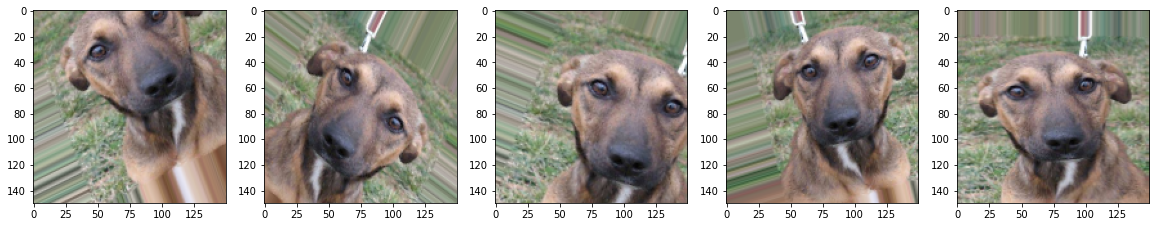

In [54]:
#plot_images(sample_training_exp[15:20])
augmented_images = [train_data_gen[3][0][0] for i in range(5)]
plot_images(augmented_images)

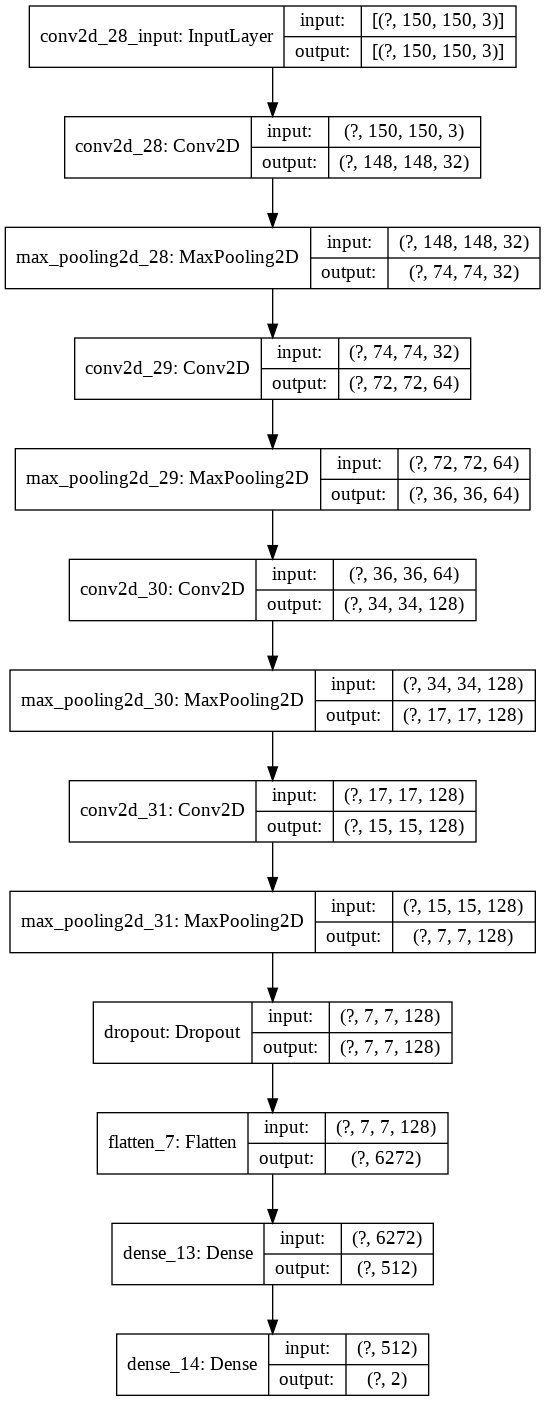

In [57]:
model=tf.keras.models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation=tf.keras.activations.relu,input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),activation=tf.keras.activations.relu))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3),activation=tf.keras.activations.relu))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3),activation=tf.keras.activations.relu))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

plot_model(model,show_shapes=True)

In [58]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 20s 986ms/step - loss: 0.6981 - accuracy: 0.5135 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 19s 949ms/step - loss: 0.6894 - accuracy: 0.5185 - val_loss: 0.6909 - val_accuracy: 0.5080
Epoch 3/100
20/20 [==============================] - 19s 961ms/step - loss: 0.6792 - accuracy: 0.5740 - val_loss: 0.6616 - val_accuracy: 0.6130
Epoch 4/100
20/20 [==============================] - 19s 956ms/step - loss: 0.6747 - accuracy: 0.5890 - val_loss: 0.6676 - val_accuracy: 0.5900
Epoch 5/100
20/20 [==============================] - 19s 958ms/step - loss: 0.6563 - accuracy: 0.6080 - val_loss: 0.6399 - val_accuracy: 0.6400
Epoch 6/100
20/20 [==============================] - 19s 967ms/step - loss: 0.6583 - accuracy: 0.6075 - val_loss: 0.6458 - val_accuracy: 0.6420
Epoch 7/100
20/20 [==============================] - 19s 972ms/step - loss: 0.6480 - accuracy: 0.6385 - val_loss: 0.6231 - val_accuracy:

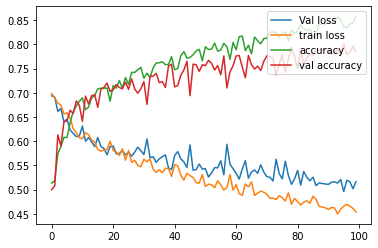

In [59]:
plt.plot(history.history['val_loss'],label='Val loss')
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend(loc='upper right')
plt.show()